In [1]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [32]:
#Import data
gev10 = pd.read_csv("10GeV.txt",skiprows=1)
gev5 = pd.read_csv("5GeV.txt",skiprows=1)
gev2 = pd.read_csv("2GeV.txt",skiprows=1)
print(np.shape(gev10))
gev10=np.asarray(gev10)
gev5=np.asarray(gev5)
gev2=np.asarray(gev2)
#print(gev10[:,1])

(838, 2)


In [68]:
#equation 1.1 of Lewin and Smith
MD = 10 #geV
MT = 71 #geV approx for germanium

r = 4*(MD*MT)/(MD+MT)**2
print(r)

E0 = 4.4 #keV--a total guess
R0 = 1.7*E0*r #to get the rate at Er=0 correct.

0.4328608443834781


In [69]:
def dRdE(Er):
    return (R0/(E0*r))*np.exp(-(Er/(E0*r)))

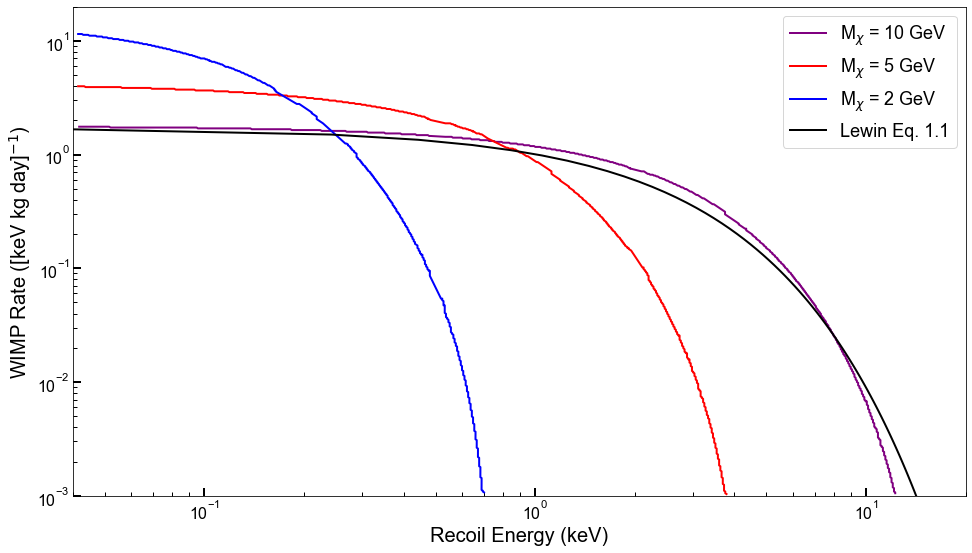

In [70]:
plt.figure(figsize=(16,9))

plt.plot(gev10[:,0],gev10[:,1],color='purple',label="M$_{\chi}$ = 10 GeV")
plt.plot(gev5[:,0],gev5[:,1],color='red',label="M$_{\chi}$ = 5 GeV")
plt.plot(gev2[:,0],gev2[:,1],color='blue',label="M$_{\chi}$ = 2 GeV")

Ervec = np.linspace(0.04,20,100)
plt.plot(Ervec,dRdE(Ervec),color='k',label="Lewin Eq. 1.1")

plt.xlabel("Recoil Energy (keV)",size=20)
plt.ylabel("WIMP Rate ([keV kg day]$^{-1}$)",size=20)
#plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
#plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(0.04,20)
plt.ylim(1e-3,20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=18)

#plt.axvline(880)
#plt.text(885,500,"511 keV at bin ~880")
#plt.axvline(1940)
#plt.text(1945,4000,"1274 keV at bin ~1940")
#plt.axvline(2650)
#plt.text(2655,2000,"1785 keV at bin ~2650")
#point = [880,511]
#point2 = [1940,1274]
#point3 = [2650, 1785]

plt.show()